# WECC Heat Wave Load Correlations


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm


## Set the Directory Structure

In [2]:
# Identify the data input and output directories:
load_data_input_dir =  '/Users/burl878/Documents/Code/code_repos/heat_wave_load_visualization/data/tell_output/'
metadata_input_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Analysis/'
image_output_dir =  '/Users/burl878/Documents/Travel/2023_AGU_Fall_Meeting/Poster/Figures/'


## Aggregate the Load Time Series


In [3]:
# Define a function to aggregate the load time series across BAs:
def process_load_time_series(load_data_input_dir: str, metadata_input_dir: str, scenario: str, year: str, start_time: str, end_time: str):
    # Convert the start and end times to datetime variables:
    start_day = pd.to_datetime(start_time)
    end_day = pd.to_datetime(end_time)
    
    # Read in the BA-to-interconnection mapping file:
    ba_mapping = pd.read_csv((metadata_input_dir + 'BA_to_Interconnection_Mapping.csv'))

    # Read in the TELL BA output file:
    if scenario == 'historic':
       tell_df = pd.read_csv((load_data_input_dir + scenario + '/2018/' + 'TELL_Balancing_Authority_Hourly_Load_Data_' + year + '_Scaled_2018.csv'))
    else:
       tell_df = pd.read_csv((load_data_input_dir + scenario + '/2019/' + 'TELL_Balancing_Authority_Hourly_Load_Data_' + year + '_Scaled_2019.csv'))

    # Merge in the interconnection mapping using common BA codes:
    tell_df = pd.merge(tell_df, ba_mapping, on='BA_Code')
        
    # Subset to just the BAs in the WECC:
    tell_df = tell_df.loc[tell_df['Interconnection'] == 'WECC']
        
    # Rename the a few columns to make them more readable:
    tell_df.rename(columns={'BA_Code': 'BA', 'Scaled_TELL_BA_Load_MWh': 'Load_MWh'}, inplace=True)
    
    # Only keep the columns we need:
    tell_df = tell_df[['BA','Time_UTC','Load_MWh']]
    
    # Convert the timestamp into a datetime variable:
    tell_df['Time_UTC'] = pd.to_datetime(tell_df['Time_UTC'])
    
    # Subset to just the files in the time window:
    subset_df = tell_df.loc[(tell_df['Time_UTC'] >= start_day) & (tell_df['Time_UTC'] <= end_day)]
    
    return subset_df


In [21]:
# Process the load time series:
load_df = process_load_time_series(load_data_input_dir = load_data_input_dir, 
                                   metadata_input_dir = metadata_input_dir, 
                                   scenario = 'historic', 
                                   year = '2018',
                                   start_time = '2018-07-22',
                                   end_time = '2018-07-28')

load_df


,BA,Time_UTC,Load_MWh
22368,AVA,2018-07-22 00:00:00,1454.25
22369,AVA,2018-07-22 01:00:00,1463.37
22370,AVA,2018-07-22 02:00:00,1436.10
22371,AVA,2018-07-22 03:00:00,1390.54
22372,AVA,2018-07-22 04:00:00,1325.42
...,...,...,...
469268,WAUW,2018-07-27 20:00:00,102.94
469269,WAUW,2018-07-27 21:00:00,102.21
469270,WAUW,2018-07-27 22:00:00,102.83
469271,WAUW,2018-07-27 23:00:00,101.77


## Make the Time Series Plot


In [59]:
# Define a function to plot the time series of load across BAs:
def plot_load_time_series(load_data_input_dir: str, metadata_input_dir: str, scenario: str, year: str, start_time: str, end_time: str, title_str: str,
                          image_output_dir: str, image_resolution: int, save_images=False):
    
    # Process the load time series:
    load_df = process_load_time_series(load_data_input_dir = load_data_input_dir, 
                                       metadata_input_dir = metadata_input_dir, 
                                       scenario = scenario,
                                       year = year,
                                       start_time = start_time, 
                                       end_time = end_time)
    
    # Calculate the maximum load value by BA:
    load_df['Max_Load_MWh'] = load_df.groupby('BA')['Load_MWh'].transform('max')
    
    # Calculate the normalized load for each BA:
    load_df['Load_Norm'] = load_df['Load_MWh'] / load_df['Max_Load_MWh']
    
    bas = load_df['BA'].unique()
    #print(bas)
    
    # Make the plot:
    plt.figure(figsize=(25, 10))
    plt.rcParams['font.size'] = 18
    
    # Loop over the BAs and plot their normalized load time series:
    for i in range(len(bas)):
        subset_df = load_df.loc[load_df['BA'] == bas[i]]
        plt.plot(subset_df['Time_UTC'], subset_df['Load_Norm'], color='k', linestyle='-', linewidth=1)
    #plt.plot([-14, 14], [t_max_mean, t_max_mean], color='gray', linestyle='--', linewidth=4)
    #plt.plot(np.arange(-14.5, 14.5, 1, dtype=int), hottest_output_df.mean(axis=1), color='k', linestyle='-', linewidth=5)
    #plt.xlim([-14, 14])
    #plt.xticks(np.arange(-14.5, 14.5, 1, dtype=int),['-14','-13','-12','-11','-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','$t_{0}$','+1','+2','+3','+4','+5','+6','+7','+8','+9','+10','+11','+12','+13','+14'])
    #plt.ylim([hottest_output_df.dropna().values.min()-2, hottest_output_df.dropna().values.max()+2])
    #plt.grid(True)
    #plt.xlabel('Days from the Hottest Temperature of the Year');
    #plt.ylabel('Daily Maximum Temperature [$^\circ$F]')
    #plt.title(('Heat Wave Evolution from 1980-2019: ' + ba_to_plot))
    
    # return load_df


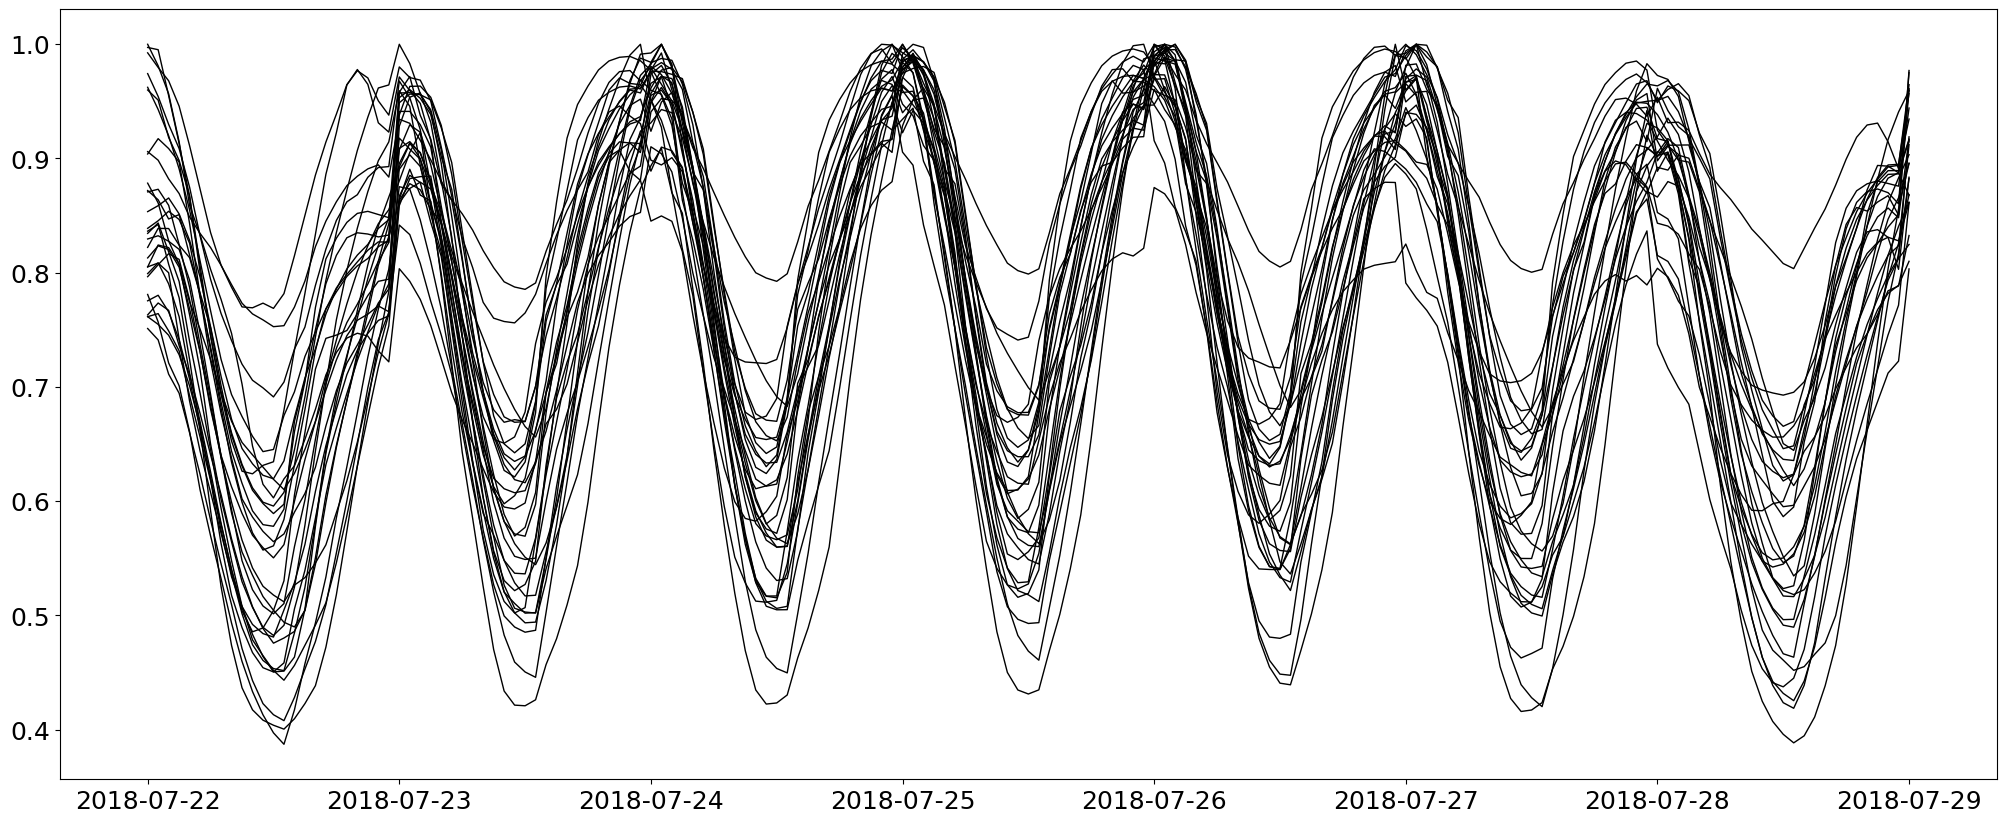

In [60]:
load_df = plot_load_time_series(load_data_input_dir = load_data_input_dir, 
                                metadata_input_dir = metadata_input_dir, 
                                scenario = 'historic', 
                                year = '2018',
                                start_time = '2018-07-22',
                                end_time = '2018-07-29', 
                                title_str = 'Heat Wave Load Time Series: 22-Jul to 28-Jul 2018 (Historic)',
                                image_output_dir = image_output_dir, 
                                image_resolution = 300, 
                                save_images = True)

load_df


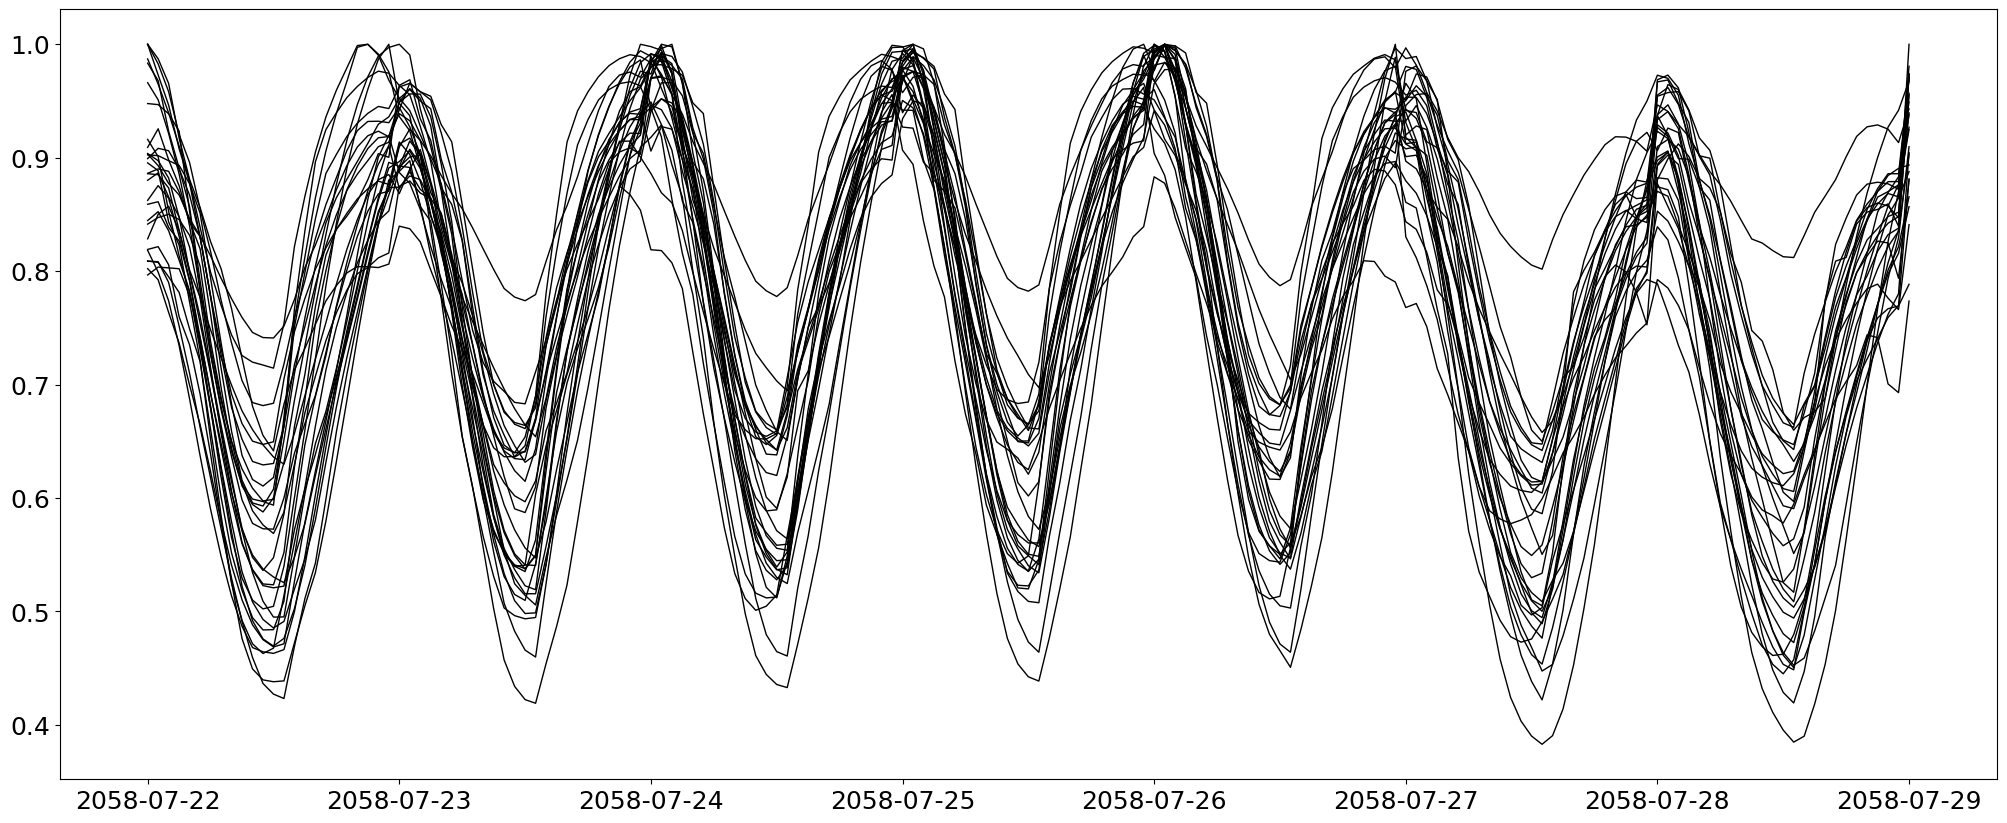

In [61]:
load_df = plot_load_time_series(load_data_input_dir = load_data_input_dir, 
                                metadata_input_dir = metadata_input_dir, 
                                scenario = 'rcp85hotter_ssp5', 
                                year = '2058',
                                start_time = '2058-07-22',
                                end_time = '2058-07-29', 
                                title_str = 'Heat Wave Load Time Series: 22-Jul to 28-Jul 2058 (rcp85hotter)',
                                image_output_dir = image_output_dir, 
                                image_resolution = 300, 
                                save_images = True)

load_df

## Make the Correlation Plot


In [4]:
# Define a function to plot the seasonal correlation in loads across BAs:
def plot_load_correlation(load_data_input_dir: str, metadata_input_dir: str, scenario: str, start_year: int, end_year: int, months, title_str: str,
                          image_output_dir: str, image_resolution: int, save_images=False):
    
    # Process the load time series:
    load_df = process_load_time_series(load_data_input_dir = load_data_input_dir, 
                                       metadata_input_dir = metadata_input_dir, 
                                       scenario = scenario, 
                                       start_year = start_year, 
                                       end_year = end_year)
    
    # Convert the timestamp into a datetime variable:
    load_df['Time_UTC'] = pd.to_datetime(load_df['Time_UTC'])
   
    # Use datetime string to get the year, month, day, and hour:
    load_df['Month'] = load_df['Time_UTC'].dt.strftime('%m').astype(int)
    
    # Subset to just the months being analyzed:
    load_df = load_df.loc[load_df['Month'].isin(months)]
    
    # Pivot the dataframe:
    load_df_pivoted = load_df.pivot(index = 'Time_UTC', columns = 'BA', values = 'Load_MWh')

    # Calculate the correlation matrix of the dataframe:
    corr_df = load_df_pivoted.corr(method = 'spearman')
    
    # Fill diagonal and upper half with NaNs:
    mask = np.zeros_like(corr_df, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    corr_df[mask] = np.nan

    # Specify the colormap:
    colors = cm.get_cmap('viridis_r', 12)
    
    # Make the correlation plot:
    f = plt.figure(figsize=(25, 10))
    plt.rcParams['font.size'] = 18
    plt.matshow(corr_df, fignum=f.number, cmap=colors, vmin=0.7, vmax=1)
    cb = plt.colorbar().ax.tick_params(labelsize=18)
    plt.title((title_str), fontsize=24);
    plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation='vertical')
    plt.yticks(range(len(corr_df.columns)), corr_df.columns)
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
        filename = ('Correlation_' + title_str + '.png').replace(" ", "_").replace("-", "_").replace(",", "")
        plt.savefig(os.path.join(image_output_dir, filename), dpi=image_resolution, bbox_inches='tight')
        
    # Print the average correlation across all BAs:
    print(('Average Correlation, ' + title_str + ' = ' + str(corr_df.reset_index(drop=True).stack().mean().round(2))))
    
    # Return the processed dataframe:
    return corr_df


In [5]:
corr_df = plot_load_correlation(load_data_input_dir = load_data_input_dir, 
                                metadata_input_dir = metadata_input_dir, 
                                scenario = 'rcp85hotter_ssp5', 
                                start_year = 2060, 
                                end_year = 2100,
                                months = [12, 1, 2],
                                title_str = 'rcp85hotter_ssp5, Dec-Jan-Feb, 2060-2099',
                                image_output_dir = image_output_dir, 
                                image_resolution = 300, 
                                save_images = False)

corr_df


TypeError: process_load_time_series() got an unexpected keyword argument 'start_year'